# Steps for Lead Score Data Analysis
1) Importing Necessary Libraries
2) Data Loading And Preparation
3) Missing Values Check
4) Univariate and Bivariate Analysis
5) Dummy Variable Creation
6) Test-Train Split
7) Scaling
8) Model Building
9) Model Predictions
10) Finding the optimal Cutoff

# 1) Importing Necessary Library

In [1142]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra Libraries 
# Suppress unnecessary packages

import warnings
warnings.filterwarnings('ignore')

# 2) Data Loading and Preparation

In [1214]:
# We need to read the Lead Data CSV file and save it in a dataframe df
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1215]:
# We need to check data captured at the end of period

df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [1216]:
# We need to check number of Rows & Columns available in a data Frame
# Validated it with the original dataset. number of rows and columns are the same
df.shape

(9240, 37)

In [1217]:
# We need to check column wise data types

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# As per our above validation all the columns have correct Datatype

In [1218]:
# We need to check if there are non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
# As analyzed above, there are no null values present across all data types

In [1219]:
# Inspect the different columns in the dataset

for col in df.columns:
    print(col)

Prospect ID
Lead Number
Lead Origin
Lead Source
Do Not Email
Do Not Call
Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
Last Activity
Country
Specialization
How did you hear about X Education
What is your current occupation
What matters most to you in choosing a course
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Tags
Lead Quality
Update me on Supply Chain Content
Get updates on DM Content
Lead Profile
City
Asymmetrique Activity Index
Asymmetrique Profile Index
Asymmetrique Activity Score
Asymmetrique Profile Score
I agree to pay the amount through cheque
A free copy of Mastering The Interview
Last Notable Activity


In [1220]:
# Let us understand statistical information such as count, mean, deviation, min, max etc for numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1221]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


# We see that there are no duplicates available in our data

# 3) Missing Values Check 

In [ ]:
# Check the number of missing values in each column

In [1222]:
missing_values= df.isnull().sum()
missing_values_sorted=missing_values.sort_values(ascending=False)
print(missing_values_sorted)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

# From the above analysis that there are lot of columns with missing values. Clearly, these columns are not useful. Let's eliminate the column having greater than 3000 missing values as they are of no use to us


In [ ]:
# Drop all the values in which greater than 3000 missing values are present

In [1223]:
# Now that we have validated how many null values are there for all columns. 
# We need to figure out the percentages for all the columns

round(df.isnull().sum()/len(df.index),2)*100


Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [ ]:
# We have noticed that there are null values for some of the columns. We can drop those columns which have missing values greater than 40%

In [1224]:
# dropping the columns with missing values greater than or equal to 40% and let us mot drop lead profile, How did you hear abou X education as they contain "Seect" which we will analyze later



df.drop(['Lead Quality',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'], axis = 1, inplace = True)


In [1225]:
# Finding the null percentages across columns after removing the above columns
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

<Axes: ylabel='City'>

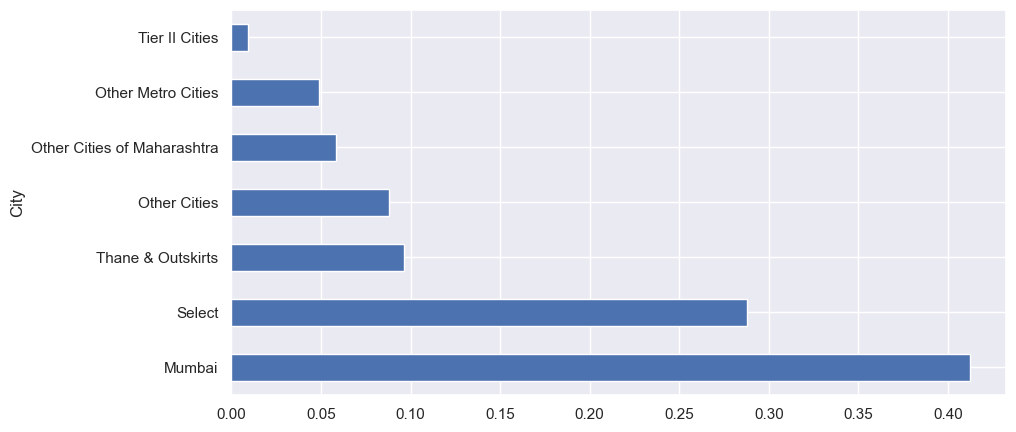

In [1226]:
# Let us also drop City and Country column as they are not part for our analysis. But before dropping it let us plot it


# Analysis of City
# This column has 40 % missing values
df['City'].value_counts(normalize=True).plot.barh()

In [1227]:
# Finding the percentage of the different categories of this column:
round(df['City'].value_counts(normalize=True),2)*100

City
Mumbai                         41.0
Select                         29.0
Thane & Outskirts              10.0
Other Cities                    9.0
Other Cities of Maharashtra     6.0
Other Metro Cities              5.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

In [1228]:
# Since most values are 'Mumbai' , we can drop this column as it is not really important for our analysis

df.drop(['City'], axis = 1, inplace = True)

In [1233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<Axes: ylabel='Country'>

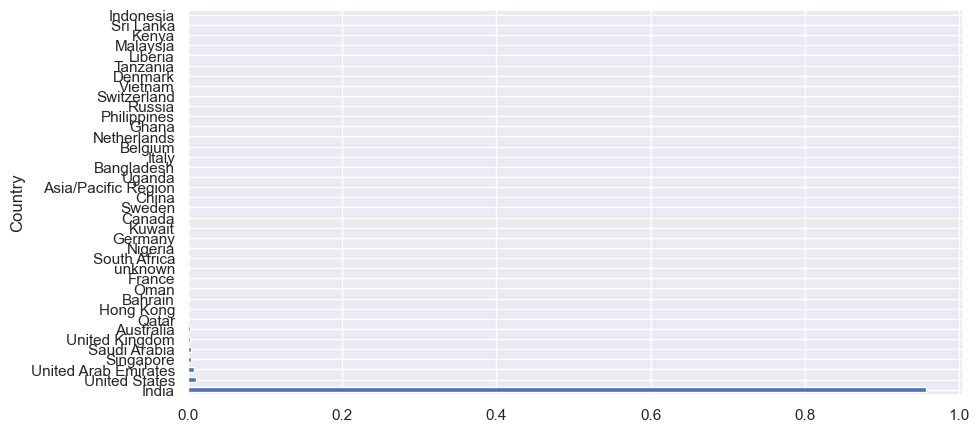

In [1234]:
# Analysis of Country
# This column has 27 % missing values
df['Country'].value_counts(normalize=True).plot.barh()

In [1235]:
# We can see that this is highly skewed column as most of the leads are from "India".Let us discard this variable

# Since most values are 'india' , we can drop this column as it is not really important for our analysis

df.drop(['Country'], axis = 1, inplace = True)

In [1236]:
# Finding the null percentages across columns after removing the above columns
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

Now there are few columns which have "SELECT" level in the data which basically means that student had not  selected the option for that particular column which is why it is shown as "SELECT". These values are similar to missing values and hence we need to identify these value count in the columns present.


In [1237]:
# Get the value counts of all the columns

for column in df:
    print(df[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


# We have noticed that Specialization, Lead profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them

In [1238]:
df['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [1239]:
df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [1240]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [1241]:
df.drop(['Lead Profile', 'How did you hear about X Education','Specialization'], axis = 1, inplace = True)

# We noticed that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include "Do Not Call", "Search, Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque". Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

We need to confirm this using Univariate and Bivariate analysis as well

# 4) Univariate and Bivariate Analysis:

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

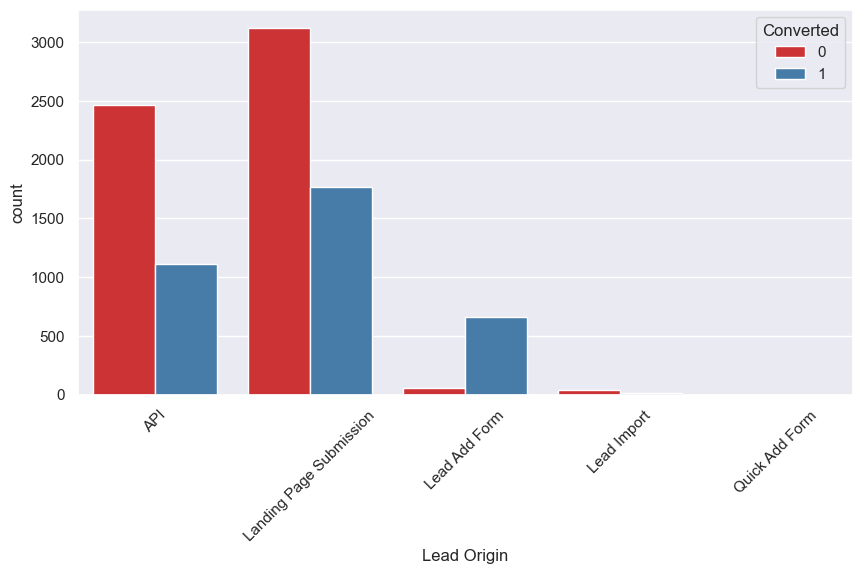

In [1242]:
# We see converted column in the data which has a flag 0 or 1 

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Lead Origin", hue= "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Inferences:

1) We have observed from the above graph that Lead Add Form has maximum conversion Rate
2) Lead Import has lowest Conversion Rate
3) API and Landing page have approimately 40% conversion rate

   Overall Conversion Rate can be improved by focussing majorly on API and Landing Page

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'google'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

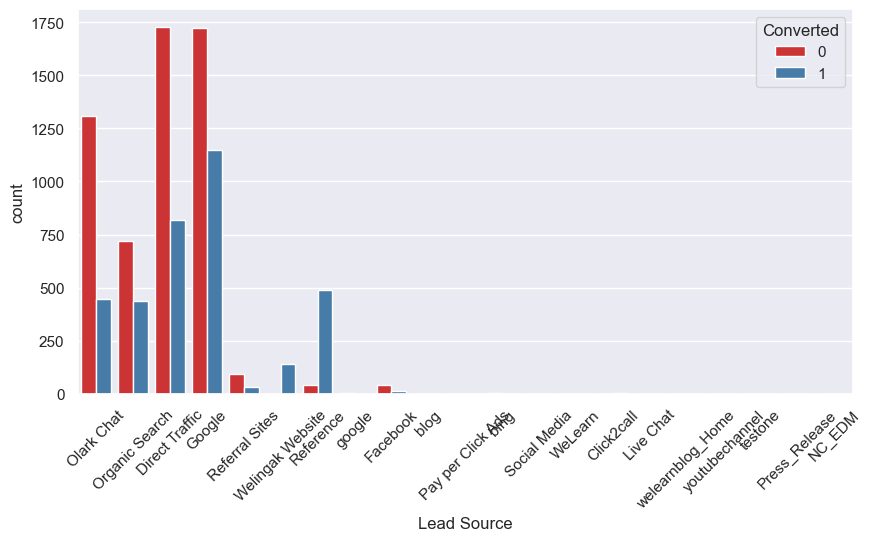

In [1243]:
# Let us analyze Lead Origin

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Lead Source", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Inferences:

For Lead Source the maximum traffic is from Google

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

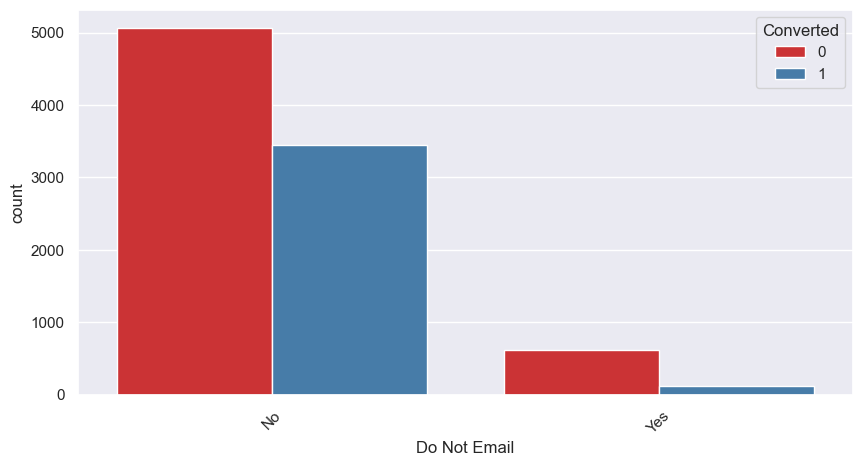

In [1244]:
# Let us analyze "Do not Email"


sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Do Not Email", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Inference:
    
Most entries are no, so no inference can be drawn from this variable

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

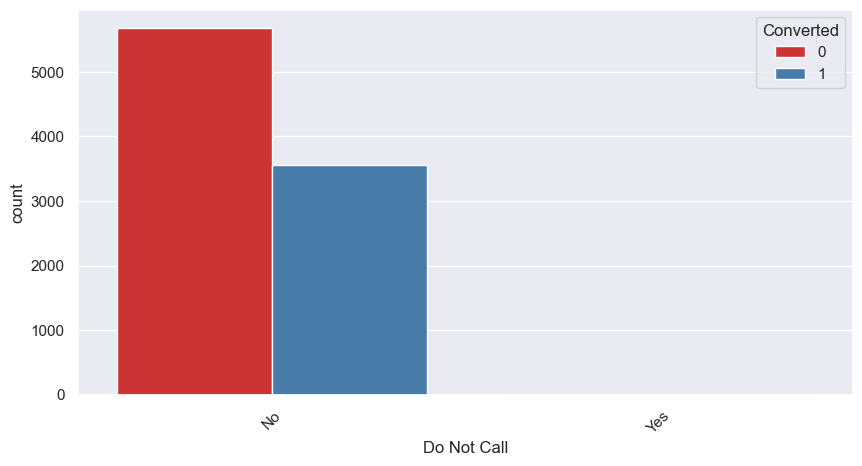

In [1245]:
# Let us analyze "Do not Call"


sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Do Not Call", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Inference

Most entries are No, so no inference can be drawn from this variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'Approached upfront'),
  Text(12, 0, 'SMS Sent'),
  Text(13, 0, 'Visited Booth in Tradeshow'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

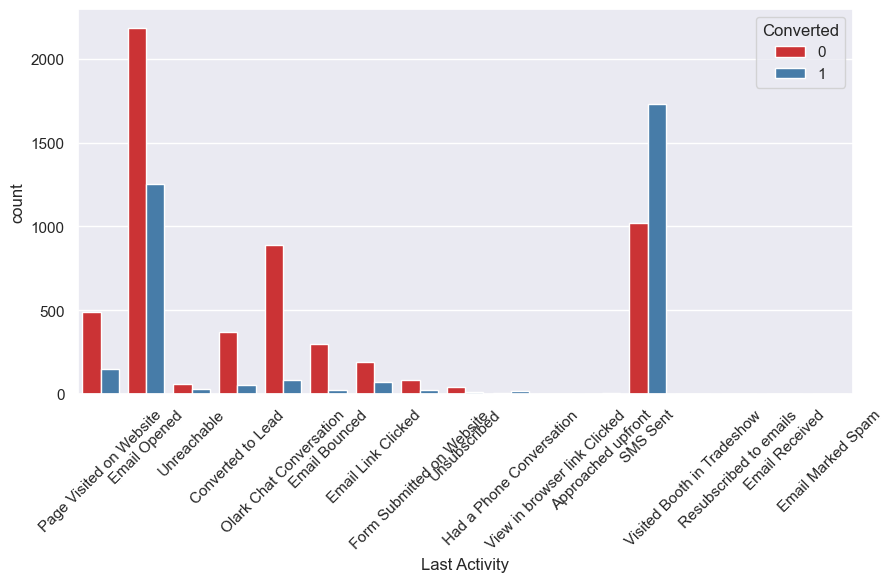

In [1246]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Last Activity", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Infrences:

SMS Sent & Email opened has maximum conversion rate for lead for Latest Activity Field

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

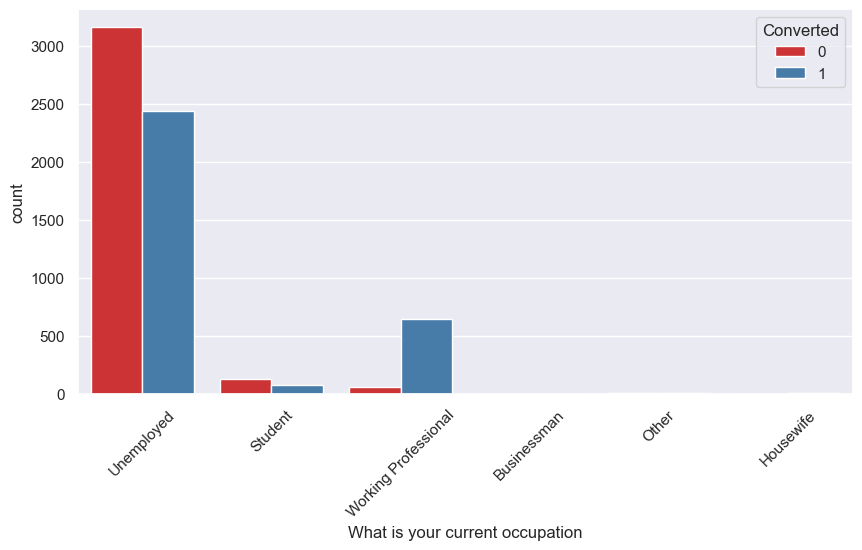

In [1247]:

# Let us now analyze "What is your current occupation"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="What is your current occupation", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Inferences:
    
From the above mentioned Graph it is clear that conversion rate is maximum for Working Professional and then for Unemployed

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

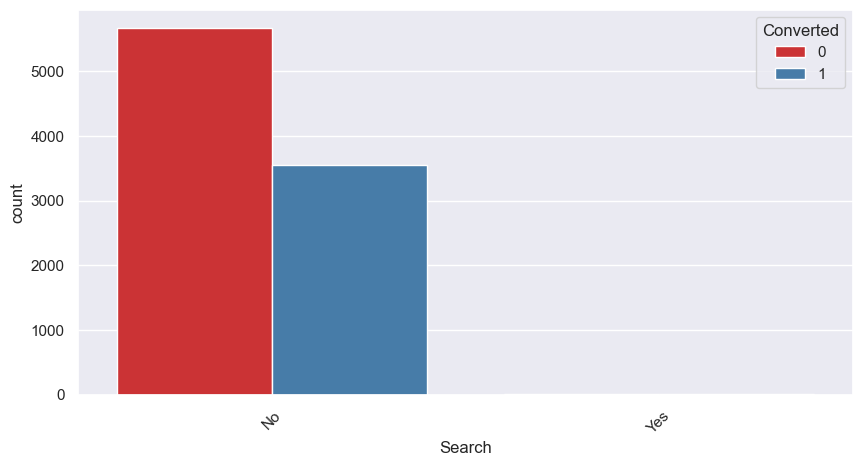

In [1248]:


# Let us now analyze "Search"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Search", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)


We have noticied that maximum conversion rate is concentrated in "No". Hence, we cannot draw any inferences from this

(array([0]), [Text(0, 0, 'No')])

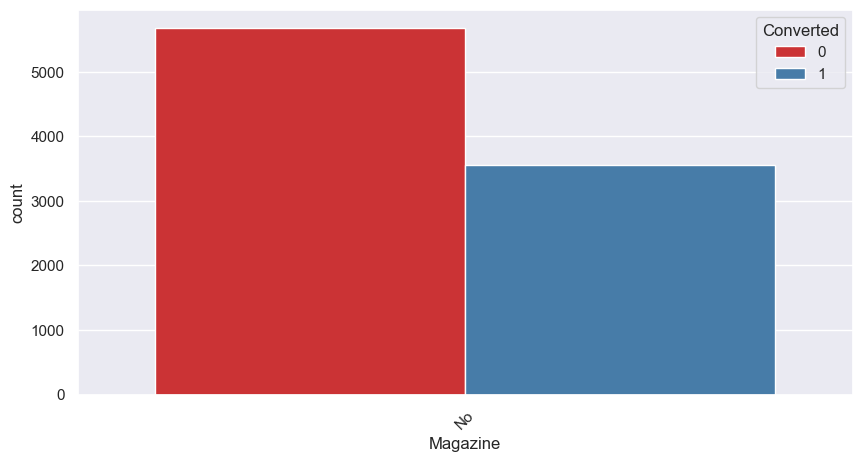

In [1249]:

# Let us now analyze "Magazine"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Magazine", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

As noticed from the above graph that maximum conversion rate is concentrated in "No". So, we cannot draw any inferences from them

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

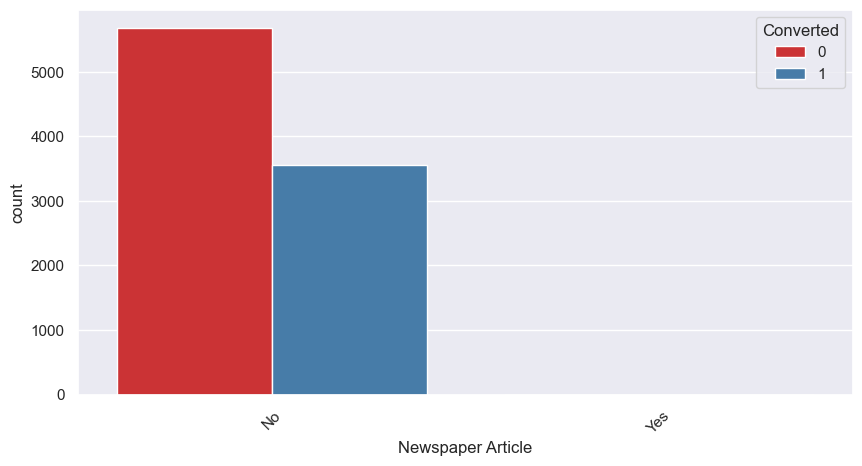

In [1250]:
# Let us now analyze "Newspaper Article"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Newspaper Article", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

We cannot draw any inferences from this as maximum conversion rate is concerntraed for "No". Hence this can be neglected from analysis

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

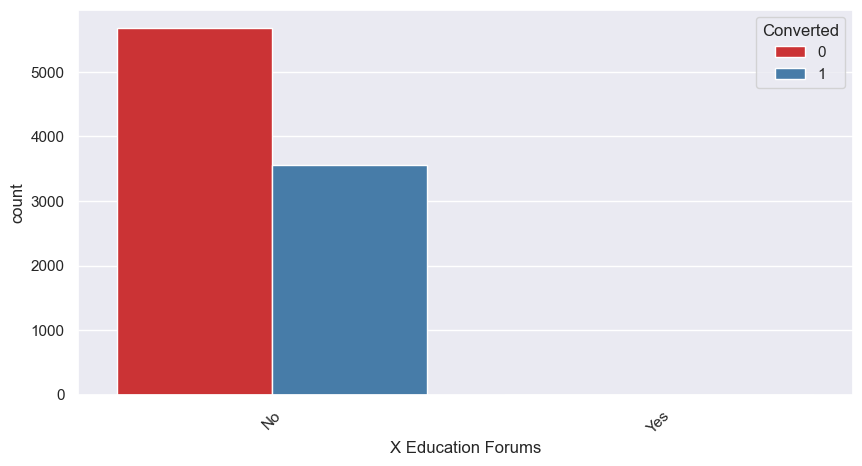

In [1251]:


# Let us now analyze "X Education Forums"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="X Education Forums", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

From the above graph it is clear that conversion rate is maximum for "No" and hence, we cannot draw any inferences from them

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

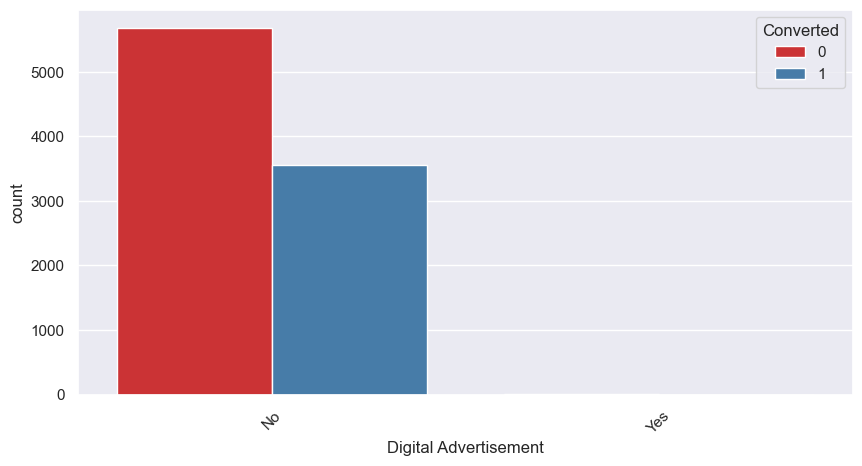

In [1252]:
# Let us now analyze "Digital Advertisement"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Digital Advertisement", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Even this variable can be excluded from analysis as most of the conversion rate is concentrated at "NO"

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

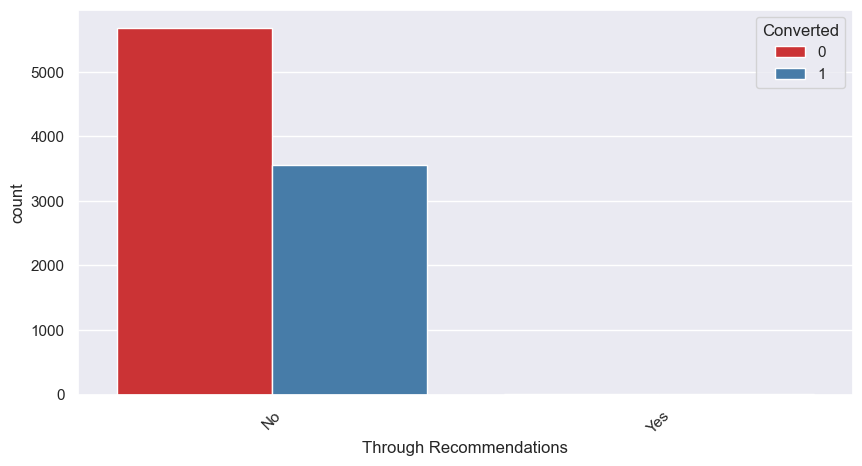

In [1253]:
# Let us now analyze "Through Recommendations"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Through Recommendations", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Even this variable can be excluded from analysis as most of the conversion rate is concentrated at "NO"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

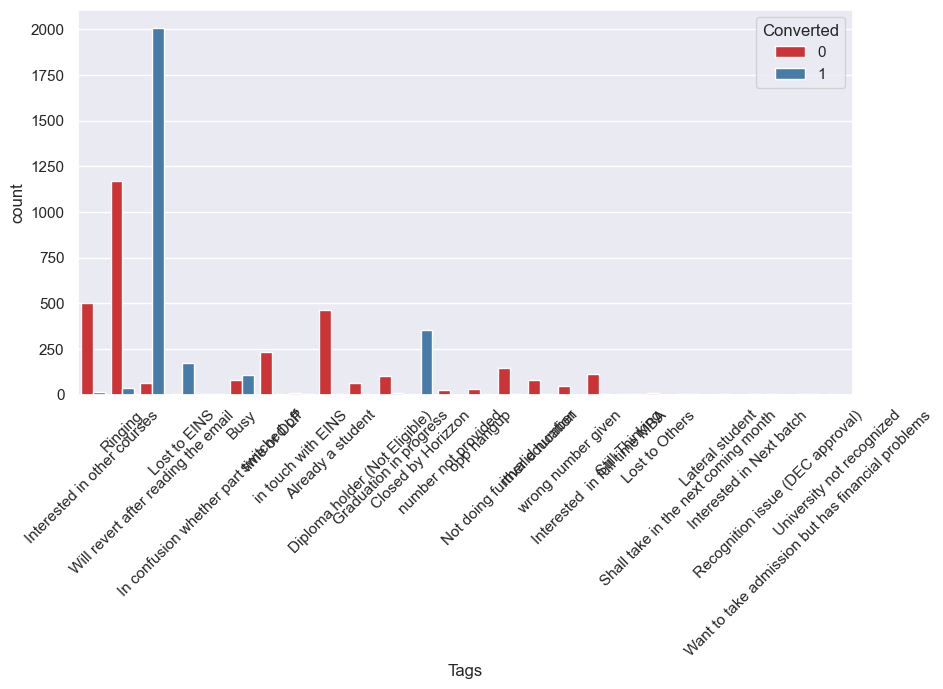

In [1254]:
# Let us now analyze "Tags"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Tags", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

From the above it is clear that this column must be used by organization to check intereset of the lead, if they are intereseted in this coure. Then we can neglect it from our analysis

(array([0]), [Text(0, 0, 'No')])

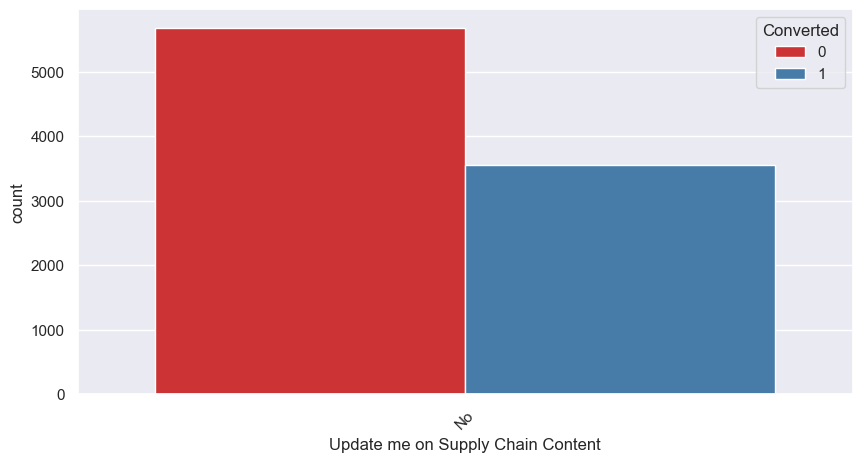

In [1255]:
# Let us now analyze "Update me on Supply Chain Content"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Update me on Supply Chain Content", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Even this variable can be excluded from analysis as most of the conversion rate is concentrated at "NO"

(array([0]), [Text(0, 0, 'No')])

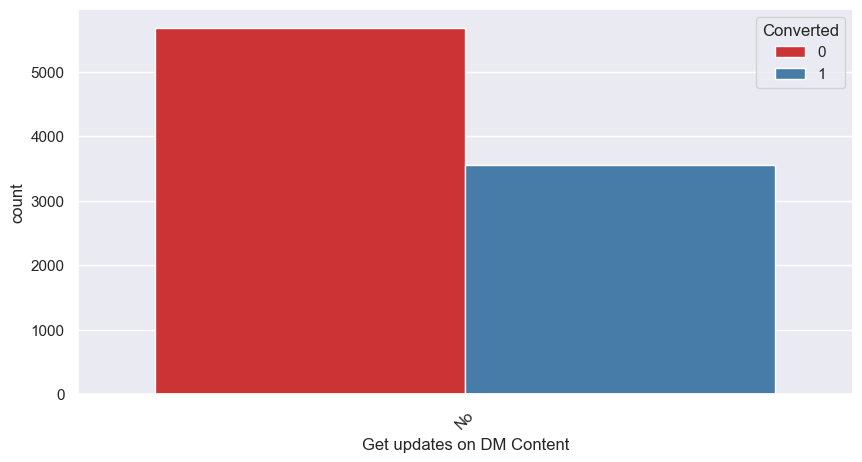

In [1256]:
# Let us now analyze "Get updates on DM Content"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Get updates on DM Content", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Even this variable can be excluded from analysis as most of the conversion rate is concentrated at "NO"

(array([0]), [Text(0, 0, 'No')])

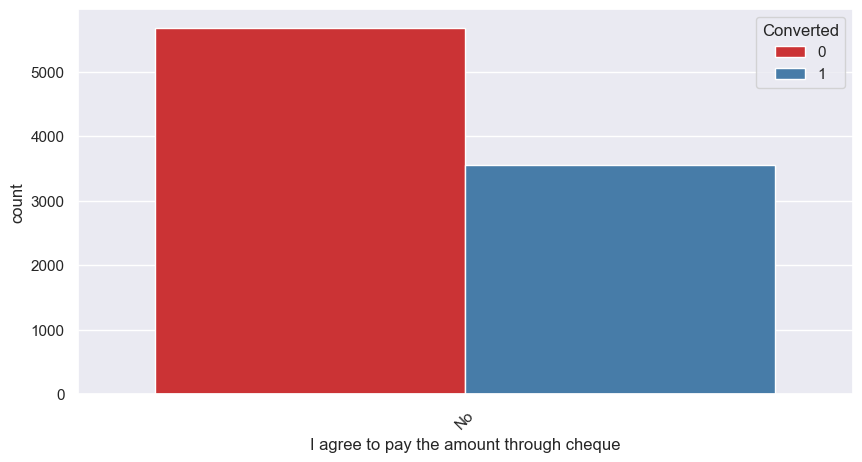

In [1257]:
# Let us now analyze "I agree to pay the amount through cheque"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="I agree to pay the amount through cheque", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Even this variable can be excluded from analysis as most of the conversion rate is concentrated at "NO"

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

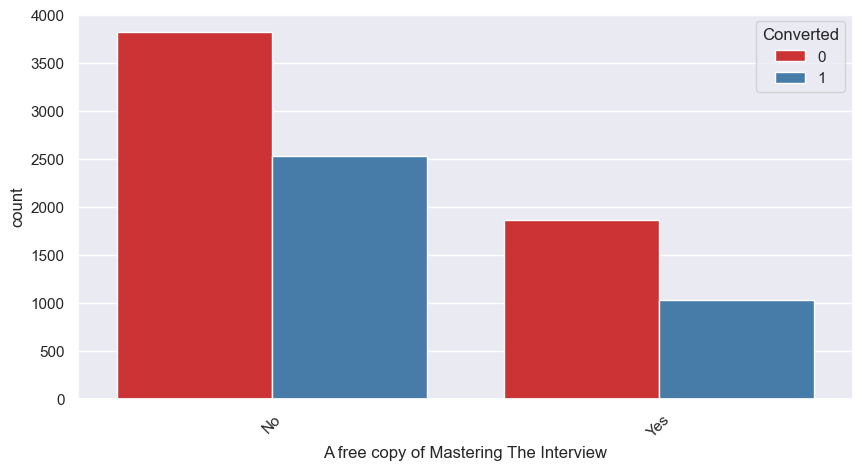

In [1258]:
# Let us now analyze "A free copy of Mastering The Interview"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="A free copy of Mastering The Interview", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

Even this variable can be excluded from analysis as most of the conversion rate is concentrated at "NO"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

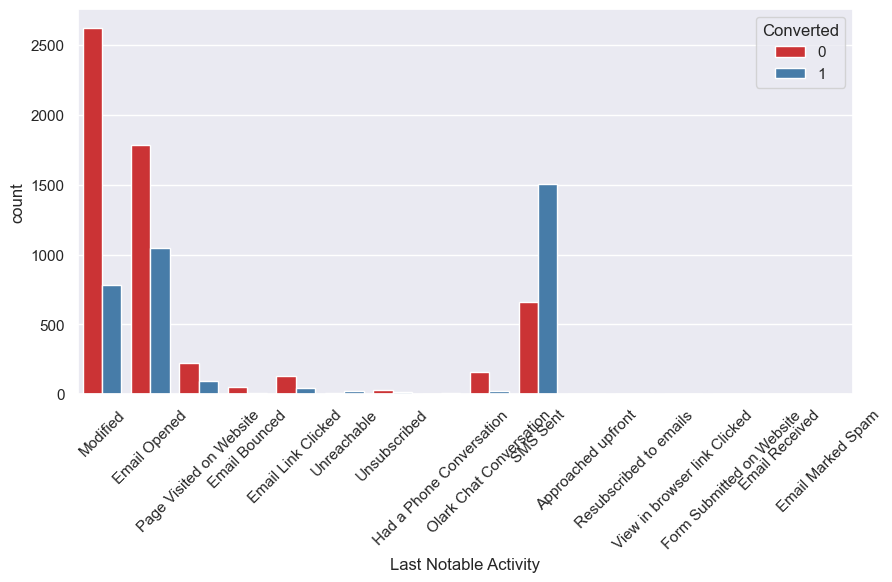

In [1259]:
# Let us now analyze "Last Notable Activity"

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Last Notable Activity", hue=  "Converted", data = df, palette ='Set1')
plt.xticks(rotation=45)

We have noticied the maximum conversion rate is for SMS Sent, Email opened and Modified

In [1260]:
# Let us now analyse "Total Time Spent on Website"
df['Total Time Spent on Website'].describe(percentiles=[0.05,0.25, 0.5,0.75, 0.90, 0.95, 0.99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

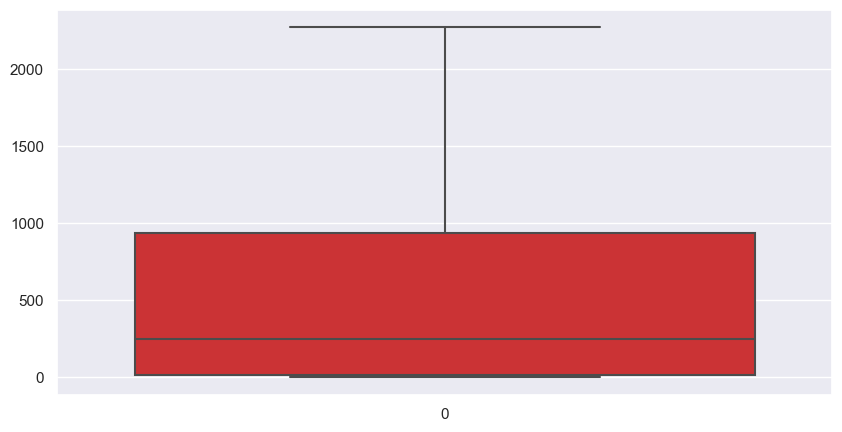

In [1261]:
sns.boxplot(df['Total Time Spent on Website'],orient='v',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

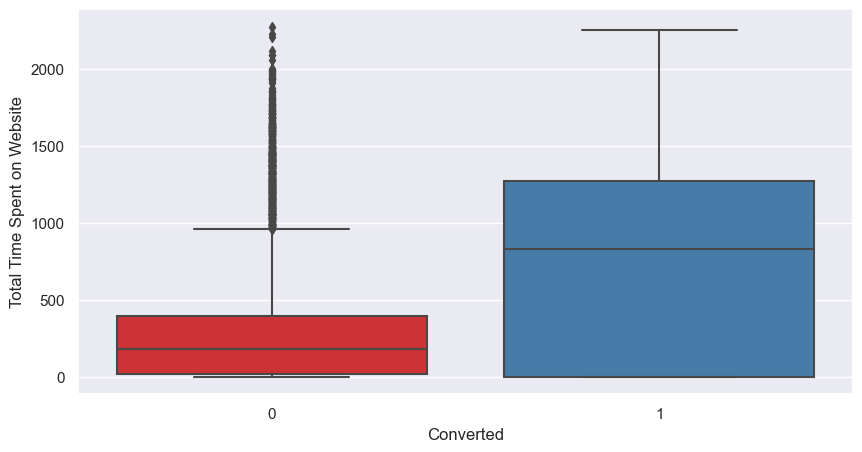

In [1262]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df,palette='Set1')

Inferences:
    
Conversion Rate is high for "Total Time Spent on Website" and hence, this variable is helpful for our analysis

In [1263]:
# Let us know Analyze Page Views per visit

df['Page Views Per Visit'].describe(percentiles=[0.05,0.25, 0.5,0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

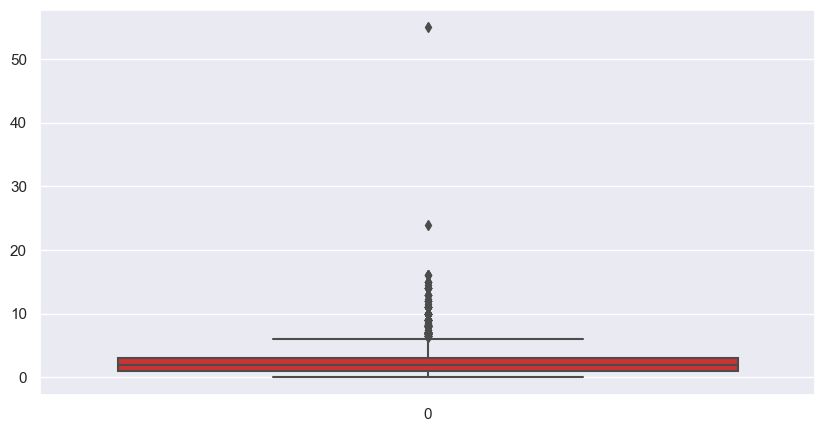

In [1264]:
sns.boxplot(df['Page Views Per Visit'],orient='v',palette='Set1')

As we can see from above graph there are number of outliers

In [1265]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

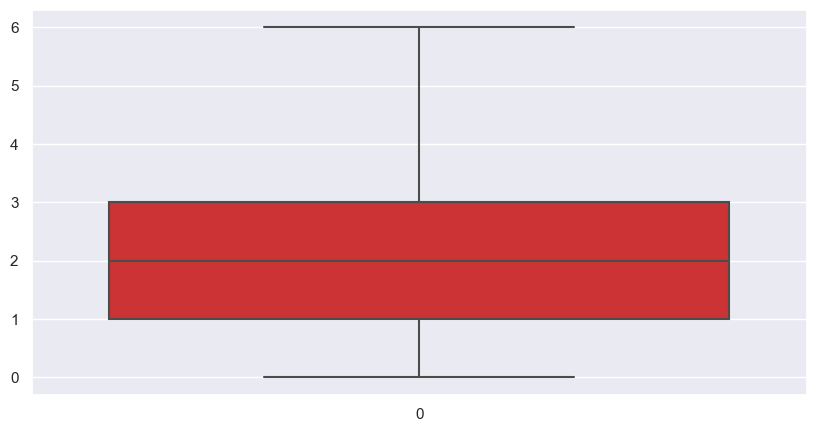

In [1266]:
sns.boxplot(df['Page Views Per Visit'],palette='Set1',orient='v')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

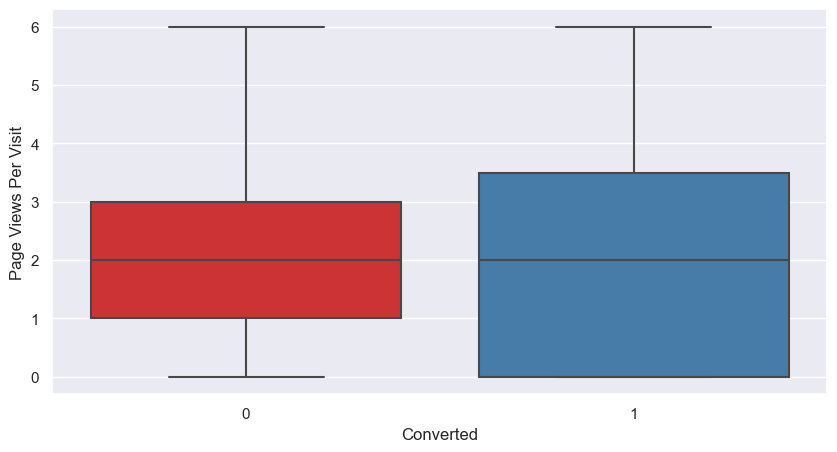

In [1267]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df,palette='Set1')

As we can see from the above Graph the median is same for both. It is difficult to predict the conversion rate


# Based on our analysis, it was noticed that most of the variables have conversion rate as "No". We can discard these variables

In [1268]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [1193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

Also,the variable "What matters most to you in choosing a course"  needs to be from our analysis

In [1269]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [1270]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)


In [1271]:
df.drop(['A free copy of Mastering The Interview'], axis = 1, inplace=True)

In [1272]:
# Check the number of null values again

df.isnull().sum().sort_values(ascending=False)

Tags                               3353
What is your current occupation    2690
TotalVisits                         137
Page Views Per Visit                137
Last Activity                       103
Lead Source                          36
Prospect ID                           0
Lead Number                           0
Lead Origin                           0
Do Not Email                          0
Converted                             0
Total Time Spent on Website           0
Last Notable Activity                 0
dtype: int64

In [1273]:
df['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

We can drop Tags column as it is not useful for our analysis. 

In [1274]:
df.drop(['Tags'], axis = 1, inplace=True)

In [1275]:
# Check the number of null values again

df.isnull().sum().sort_values(ascending=False)

What is your current occupation    2690
TotalVisits                         137
Page Views Per Visit                137
Last Activity                       103
Lead Source                          36
Prospect ID                           0
Lead Number                           0
Lead Origin                           0
Do Not Email                          0
Converted                             0
Total Time Spent on Website           0
Last Notable Activity                 0
dtype: int64

From the above anyalsis it is clear that "What is your current Occuption" has maximum number of null values. Now let us drop null values of colum "What is your current Occuption"

In [1276]:
df = df[~pd.isnull(df['What is your current occupation'])]

In [1277]:
# Check the number of null values again

df.isnull().sum().sort_values(ascending=False)

TotalVisits                        130
Page Views Per Visit               130
Last Activity                      103
Lead Source                         36
Prospect ID                          0
Lead Number                          0
Lead Origin                          0
Do Not Email                         0
Converted                            0
Total Time Spent on Website          0
What is your current occupation      0
Last Notable Activity                0
dtype: int64

We have noticed that null values are available only for "TotalVisits","Page Views Per Visit", "last Activity","Lead Source".

In [1278]:
# Now we are removing null values from "TotalVisits" column

df = df[~pd.isnull(df['TotalVisits'])]

In [1279]:
# Check the number of null values again

df.isnull().sum().sort_values(ascending=False)

Lead Source                        29
Prospect ID                         0
Lead Number                         0
Lead Origin                         0
Do Not Email                        0
Converted                           0
TotalVisits                         0
Total Time Spent on Website         0
Page Views Per Visit                0
Last Activity                       0
What is your current occupation     0
Last Notable Activity               0
dtype: int64

In [1280]:
# Now we are removing null values from "Lead Source" column

df = df[~pd.isnull(df['Lead Source'])]

In [1281]:
# Check the number of null values again

df.isnull().sum().sort_values(ascending=False)

Prospect ID                        0
Lead Number                        0
Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
What is your current occupation    0
Last Notable Activity              0
dtype: int64

In [551]:
# Now we are removing null values from "Specialization" column

#df = df[~pd.isnull(df['Specialization'])]

In [1282]:
# Check the number of null values again

df.isnull().sum().sort_values(ascending=False)

Prospect ID                        0
Lead Number                        0
Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
What is your current occupation    0
Last Notable Activity              0
dtype: int64

Now our data looks good without having null values. We can use it for our further analysis

In [1283]:
# Now let us check how many columns we have retained till now

print(len(df.index))
print(len(df.index)/9240)

6391
0.6916666666666667


# We have 69 % of the rows which seems good enough

In [1284]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Modified


In [1285]:
# Let us now drop Prospect iD and lead number from analysis

df.drop(['Prospect ID'], axis = 1, inplace=True)

In [1286]:
df.drop(['Lead Number'], axis = 1, inplace=True)

In [1287]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Modified


# 5) Dummy Variable Creation

We have Converted Column which is going to be very important for our analysis as it will help us figureout whether the lead are converted or not

In [1288]:
# Check the columns which are of type 'object'

temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [1289]:
variable =  ['Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[variable] = df[variable].apply(binary_map)


In [1290]:
variable

['Do Not Email']

In [1291]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation'
                             ]], drop_first=True)
dummy= dummy.astype(int)

dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1292]:
# Concatenating the dummy_data to the df dataframe
df = pd.concat([df, dummy], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Modified,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,Email Opened,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,Modified,...,0,1,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Modified,...,0,0,0,0,0,0,0,0,1,0


In [1293]:
# Drop the variables for which the dummy variables have been created

df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation',
                   'Last Notable Activity'], axis=1,inplace=True)

In [1294]:
# Let's take a look at the dataset again

df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# 6)Test-Train Split
The next step is to split the dataset into training an testing sets.

In [1295]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [1296]:
# Putting target variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1297]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 7) Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [1298]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [1299]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
533,0,0.011952,0.364877,0.500000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
846,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7546,0,0.035857,0.372359,1.000000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8631,0,0.019920,0.397447,0.833333,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7824,0,0.003984,0.081866,0.166667,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# 8)Model Building


In [1300]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1301]:
# Import RFE and select 15 variables

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [1302]:
rfe.support_

array([ True,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False,  True,  True])

In [1303]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 24),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 15),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 21),
 ('Lead Source_testone', False, 26),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', F

In [1304]:
# Below columns are selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [1305]:
# Select only the columns selected by RFE

X_train = X_train[cols]

#  Model 1

In [1306]:
# Import StatsModels
import statsmodels.api as sm

In [1307]:
# Fit a logistic regression model on X_train

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.3
Date:                Tue, 18 Jun 2024   Deviance:                       4142.6
Time:                        23:00:40   Pearson chi2:                 4.66e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3672
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0799      0.213     -9.749      0.000      -2.498      -1.662
Do Not Email                                            -1.3856      0.217     -6.386      0.000      -1.811      -0.960
TotalVisits                                             10.1299      2.913      3.478      0.001       4.421      15.839
Total Time Spent on Website                              4.4620      0.186     24.015      0.000       4.098       4.826
Lead Origin_Lead Add Form                                3.2576      1.134      2.872      0.004       1.035       5.480
Lead Source_Olark Chat                                   1.5655      0.128     12.208      0.000       1.314       1.817
Lead Source_Reference                                    0.6484      1.155      0.561      0.574      -1.615       2.912
Lead Source_Welingak Website                             2.4085      1.344      1.791      0.073      -0.227       5.044
Last Activity_Converted to Lead                         -0.8756      0.225     -3.894      0.000      -1.316      -0.435
Last Activity_Email Bounced                             -0.8873      0.428     -2.074      0.038      -1.726      -0.049
Last Activity_Had a Phone Conversation                   2.0679      0.704      2.939      0.003       0.689       3.447
Last Activity_Olark Chat Conversation                   -1.1708      0.182     -6.446      0.000      -1.527      -0.815
Last Activity_SMS Sent                                   1.0317      0.085     12.125      0.000       0.865       1.198
Last Activity_View in browser link Clicked             -20.9714   1.35e+04     -0.002      0.999   -2.66e+04    2.65e+04
What is your current occupation_Unemployed              -0.1014      0.198     -0.512      0.608      -0.490       0.287
What is your current occupation_Working Professional     2.3616      0.264      8.933      0.000       1.843       2.880
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [1308]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1309]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,67.40
5,Lead Source_Reference,51.96
6,Lead Source_Welingak Website,16.35
13,What is your current occupation_Unemployed,3.85
2,Total Time Spent on Website,2.27
11,Last Activity_SMS Sent,1.71
1,TotalVisits,1.66
0,Do Not Email,1.63
8,Last Activity_Email Bounced,1.57
14,What is your current occupation_Working Profes...,1.56


Inferences:

a) Accepted value of VIF is always less than 5
b) From the above analysis it is clear that VIF value is high for "Lead origin_Lead add Form","Lead Source_Reference" and Lead Source_Welingak Website

In [1310]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

# Model 2

In [1311]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.4
Date:                Tue, 18 Jun 2024   Deviance:                       4142.9
Time:                        23:01:07   Pearson chi2:                 4.66e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3672
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0790      0.213     -9.749      0.000      -2.497      -1.661
Do Not Email                                            -1.3844      0.217     -6.384      0.000      -1.809      -0.959
TotalVisits                                             10.1262      2.913      3.476      0.001       4.417      15.835
Total Time Spent on Website                              4.4620      0.186     24.015      0.000       4.098       4.826
Lead Origin_Lead Add Form                                3.8839      0.246     15.800      0.000       3.402       4.366
Lead Source_Olark Chat                                   1.5654      0.128     12.207      0.000       1.314       1.817
Lead Source_Welingak Website                             1.7820      0.762      2.338      0.019       0.288       3.276
Last Activity_Converted to Lead                         -0.8755      0.225     -3.894      0.000      -1.316      -0.435
Last Activity_Email Bounced                             -0.8883      0.428     -2.077      0.038      -1.727      -0.050
Last Activity_Had a Phone Conversation                   2.0683      0.703      2.940      0.003       0.690       3.447
Last Activity_Olark Chat Conversation                   -1.1705      0.182     -6.445      0.000      -1.527      -0.815
Last Activity_SMS Sent                                   1.0319      0.085     12.128      0.000       0.865       1.199
Last Activity_View in browser link Clicked             -20.9716   1.35e+04     -0.002      0.999   -2.66e+04    2.65e+04
What is your current occupation_Unemployed              -0.1025      0.198     -0.518      0.605      -0.490       0.285
What is your current occupation_Working Professional     2.3613      0.264      8.934      0.000       1.843       2.879
========================================================================================================================
"""

In [1312]:
# Make a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,3.85
2,Total Time Spent on Website,2.27
10,Last Activity_SMS Sent,1.71
3,Lead Origin_Lead Add Form,1.67
1,TotalVisits,1.66
0,Do Not Email,1.63
7,Last Activity_Email Bounced,1.57
13,What is your current occupation_Working Profes...,1.56
4,Lead Source_Olark Chat,1.50
5,Lead Source_Welingak Website,1.33


We have noticed from the above analysis that most of the variables have VIF less than 5. Hence, we can drop the values on the basis of their P values

Inferences:

Since "what is your occuption_unemployed" has maximum value of VIF and P value. We can drop this from our Analysis

In [1313]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

# Model 3

In [1314]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.6
Date:                Tue, 18 Jun 2024   Deviance:                       4143.1
Time:                        23:01:31   Pearson chi2:                 4.66e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3671
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1769      0.099    -21.929      0.000      -2.371      -1.982
Do Not Email                                            -1.3863      0.217     -6.392      0.000      -1.811      -0.961
TotalVisits                                             10.1010      2.912      3.469      0.001       4.393      15.809
Total Time Spent on Website                              4.4643      0.186     24.033      0.000       4.100       4.828
Lead Origin_Lead Add Form                                3.8869      0.246     15.815      0.000       3.405       4.369
Lead Source_Olark Chat                                   1.5677      0.128     12.230      0.000       1.316       1.819
Lead Source_Welingak Website                             1.7764      0.762      2.331      0.020       0.283       3.270
Last Activity_Converted to Lead                         -0.8767      0.225     -3.898      0.000      -1.317      -0.436
Last Activity_Email Bounced                             -0.8832      0.428     -2.065      0.039      -1.721      -0.045
Last Activity_Had a Phone Conversation                   2.0640      0.703      2.934      0.003       0.685       3.443
Last Activity_Olark Chat Conversation                   -1.1671      0.181     -6.432      0.000      -1.523      -0.811
Last Activity_SMS Sent                                   1.0287      0.085     12.126      0.000       0.862       1.195
Last Activity_View in browser link Clicked             -20.9741   1.35e+04     -0.002      0.999   -2.66e+04    2.65e+04
What is your current occupation_Working Professional     2.4594      0.184     13.344      0.000       2.098       2.821
========================================================================================================================
"""

Drop "Last Activity_View in browser link clicked" as it has high p value

In [1315]:
X_train.drop('Last Activity_View in browser link Clicked', axis = 1, inplace = True)

# Model 4

In [1316]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.3
Date:                Tue, 18 Jun 2024   Deviance:                       4146.6
Time:                        23:01:51   Pearson chi2:                 4.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3666
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1827      0.099    -21.986      0.000      -2.377      -1.988
Do Not Email                                            -1.3859      0.217     -6.389      0.000      -1.811      -0.961
TotalVisits                                             10.1562      2.913      3.486      0.000       4.446      15.866
Total Time Spent on Website                              4.4721      0.186     24.077      0.000       4.108       4.836
Lead Origin_Lead Add Form                                3.8924      0.246     15.839      0.000       3.411       4.374
Lead Source_Olark Chat                                   1.5691      0.128     12.246      0.000       1.318       1.820
Lead Source_Welingak Website                             1.7746      0.762      2.329      0.020       0.281       3.268
Last Activity_Converted to Lead                         -0.8719      0.225     -3.878      0.000      -1.313      -0.431
Last Activity_Email Bounced                             -0.8782      0.427     -2.055      0.040      -1.716      -0.040
Last Activity_Had a Phone Conversation                   2.0675      0.703      2.939      0.003       0.689       3.446
Last Activity_Olark Chat Conversation                   -1.1631      0.181     -6.412      0.000      -1.519      -0.808
Last Activity_SMS Sent                                   1.0322      0.085     12.169      0.000       0.866       1.198
What is your current occupation_Working Professional     2.4411      0.183     13.362      0.000       2.083       2.799
========================================================================================================================
"""

Inference : 

From the above analysis it is clear that "Do not Email" can be dropped from our analysis

In [1317]:
X_train.drop('Do Not Email', axis = 1, inplace = True)

Inference : 

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [1318]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.64
2,Lead Origin_Lead Add Form,1.49
9,Last Activity_SMS Sent,1.48
0,TotalVisits,1.37
4,Lead Source_Welingak Website,1.33
3,Lead Source_Olark Chat,1.22
10,What is your current occupation_Working Profes...,1.20
8,Last Activity_Olark Chat Conversation,1.19
5,Last Activity_Converted to Lead,1.02
6,Last Activity_Email Bounced,1.01


Inference : 

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

# 9) Model Predictions

In [1319]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

533     0.813076
846     0.837090
7546    0.286197
8631    0.306304
7824    0.485803
4986    0.324674
5542    0.101427
1719    0.151491
4860    0.930232
8609    0.102628
dtype: float64

In [1320]:

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.81307645, 0.83709025, 0.28619686, 0.30630408, 0.48580307,
       0.32467418, 0.1014269 , 0.1514905 , 0.93023162, 0.10262759])

Creating a dataframe with the actual conversion flag and the predicted probabilities

In [1321]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.813076
1,1,0.837090
2,1,0.286197
3,0,0.306304
4,0,0.485803


In [1322]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.813076,1
1,1,0.837090,1
2,1,0.286197,0
3,0,0.306304,0
4,0,0.485803,0


In [1323]:
# Import metrics from sklearn

from sklearn import metrics

In [1324]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2046  303]
 [1034 1090]]


In [1325]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.701095461658842


In [1326]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1327]:
# Calculate the sensitivity

TP/(TP+FN)

0.5131826741996234

In [1328]:
# Calculate the specificity

TN/(TN+FP)

0.8710089399744572

# 10) Finding the optimal cutoff

In order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [1329]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1010]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [1330]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

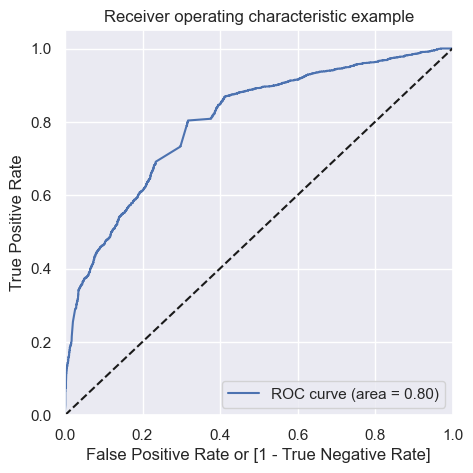

In [1331]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. 

In [1332]:
# Let's create columns with different probabilities

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.813076,1,1,1,1,1,1,1,1,1,1,0
1,1,0.837090,1,1,1,1,1,1,1,1,1,1,0
2,1,0.286197,0,1,1,1,0,0,0,0,0,0,0
3,0,0.306304,0,1,1,1,1,0,0,0,0,0,0
4,0,0.485803,0,1,1,1,1,1,0,0,0,0,0


In [1333]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.474849  1.000000  0.000000
0.1   0.1  0.610329  0.940207  0.312048
0.2   0.2  0.720098  0.864878  0.589187
0.3   0.3  0.711603  0.808851  0.623670
0.4   0.4  0.711379  0.612053  0.801192
0.5   0.5  0.701095  0.513183  0.871009
0.6   0.6  0.683210  0.411017  0.929332
0.7   0.7  0.669349  0.344633  0.962963
0.8   0.8  0.652806  0.301318  0.970626
0.9   0.9  0.598480  0.166196  0.989357


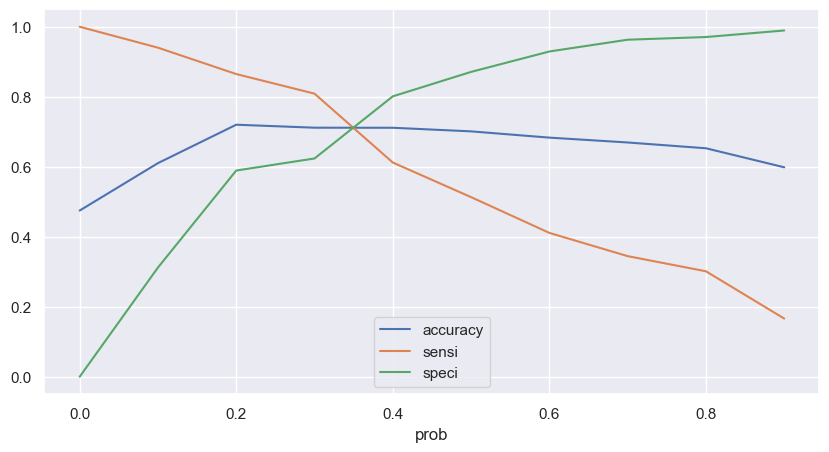

In [1334]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [1335]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.813076,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.837090,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.286197,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.306304,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.485803,0,1,1,1,1,1,0,0,0,0,0,1


In [1336]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7091437513972725

In [1337]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1911,  438],
       [ 863, 1261]], dtype=int64)

In [1338]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [1339]:
# Calculate Sensitivity

TP/(TP+FN)

0.5936911487758946

In [1340]:
# Calculate Specificity

TN/(TN+FP)

0.8135376756066411

# 11) Model Parameters

In [1341]:
# This code block was added only to showcase top 3 features and the model building was done above

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4461
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2096.5
Date:                Tue, 18 Jun 2024   Deviance:                       4193.0
Time:                        23:04:46   Pearson chi2:                 4.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3600
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2015      0.099    -22.132      0.000      -2.396      -2.007
TotalVisits                                              8.6383      2.946      2.932      0.003       2.864      14.413
Total Time Spent on Website                              4.5145      0.185     24.446      0.000       4.153       4.876
Lead Origin_Lead Add Form                                3.8735      0.245     15.793      0.000       3.393       4.354
Lead Source_Olark Chat                                   1.5757      0.128     12.328      0.000       1.325       1.826
Lead Source_Welingak Website                             1.6791      0.760      2.210      0.027       0.190       3.169
Last Activity_Converted to Lead                         -0.8562      0.225     -3.800      0.000      -1.298      -0.415
Last Activity_Email Bounced                             -2.0605      0.382     -5.387      0.000      -2.810      -1.311
Last Activity_Had a Phone Conversation                   2.1141      0.704      3.003      0.003       0.734       3.494
Last Activity_Olark Chat Conversation                   -1.1640      0.181     -6.436      0.000      -1.519      -0.810
Last Activity_SMS Sent                                   0.9606      0.083     11.530      0.000       0.797       1.124
What is your current occupation_Working Professional     2.4626      0.182     13.546      0.000       2.106       2.819
========================================================================================================================
"""

In [1342]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.64
2,Lead Origin_Lead Add Form,1.49
9,Last Activity_SMS Sent,1.48
0,TotalVisits,1.37
4,Lead Source_Welingak Website,1.33
3,Lead Source_Olark Chat,1.22
10,What is your current occupation_Working Profes...,1.20
8,Last Activity_Olark Chat Conversation,1.19
5,Last Activity_Converted to Lead,1.02
6,Last Activity_Email Bounced,1.01




Top 3 features that contributing positively to predicting hot leads in the model are:

1) TotalVisits
2) Total Time Spent on Website
3) Lead Origin_Lead Add Form



# 12)Recommendations


1)Focus on features with positive coefficients for marketing strategies.
2)Develop strategies to attract leads from top-performing lead sources.
3)Sales team should engage working professionals with SMS,messaging and Emails.
4)Leads who have spent time on sending meassages and opening the emails are also potential hot leads and hence, effective Communication channels should be used.
5) Retention rate of existing leads needs to be identified from the time of enrollment.
6)Social Meedia can be used as a potential source for understandig and interacting.It can be effectively used for marketing purpose as well by encouraging people to take action.
7)Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.
8)Existing customers feedback should be taken into consideration to improve the conversion rate.
9)Discount's can be one way of the important measure to motivate them
10)The company should make calls to the leads coming from the lead sources "Welingak Websites", "What is your current occupation_Working Professional" and "Last Activity_Had a Phone Conversation" as these are more likely to get converted.
11)Focus on leads with high potential : Based on our analysis coefficient factor was high for following :
       1) TotalVisits : 8.63
       2) Total Time Spent on Website:4.5145
       3) Lead Origin_Lead Add Form:3.87
       4)What is your current occupation_Working Professional:2.46
       5)Lead Origin_Lead Add Form :3.8735
       6)Lead Source_Welingak Website:1.6791
       7)Last Activity_Had a Phone Conversation: 2.1141